In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
from statsmodels.tsa.ar_model import AR

In [2]:
df = pd.read_csv("../nation_incremental.csv")
df["date"] = pd.to_datetime(df.date)
df.index = df.date
start, end = len(df), len(df) + 15

In [3]:
active_ts = df.active
model = AR(active_ts, freq="D").fit(ic="aic", trend="nc")
pactive_ts = active_ts.append(model.predict(start, end))

In [4]:
total_ts = df.total_confirmed
model = AR(total_ts, freq="D").fit(ic="aic", trend="nc")
ptotal_ts = total_ts.append(model.predict(start, end))

In [5]:
pred_df = pd.DataFrame({"active": pactive_ts, "total": ptotal_ts})

In [6]:
pred_df_cum = pred_df.cumsum()

## Increments estimation

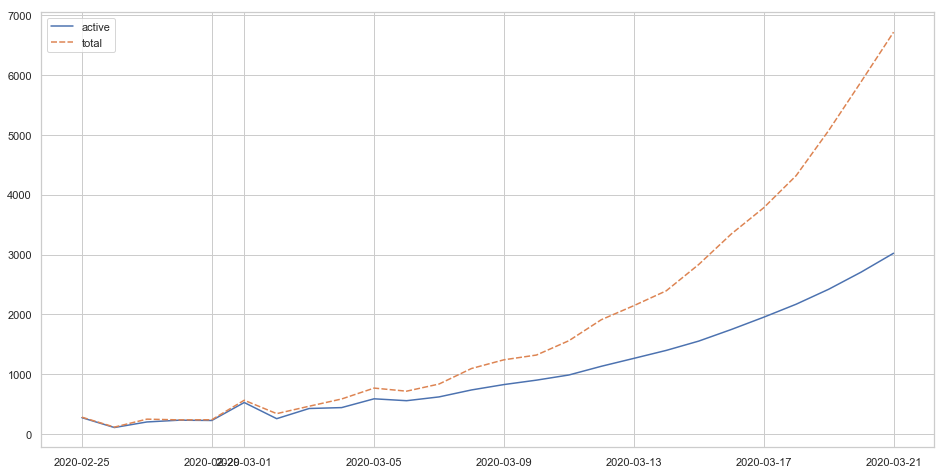

In [7]:
sns.set(style="whitegrid", rc={'figure.figsize':(16, 8)})
p = sns.lineplot(data=pred_df);

## Cumulative estimation

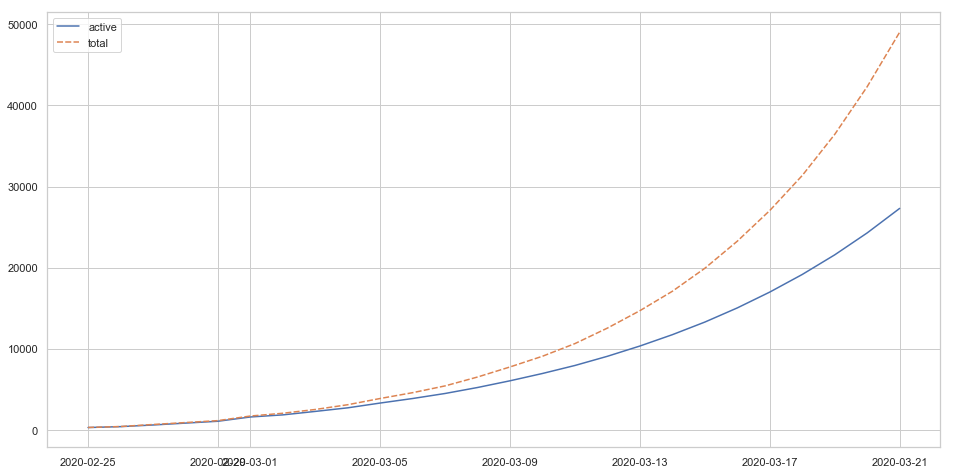

In [8]:
sns.set(style="whitegrid", rc={'figure.figsize':(16, 8)})
sns.lineplot(data=pred_df_cum);

In [9]:
pred_df_cum

,active,total
2020-02-25,275.000000,283.000000
2020-02-26,385.000000,400.000000
2020-02-27,588.000000,650.000000
2020-02-28,821.000000,888.000000
2020-02-29,1049.000000,1128.000000
2020-03-01,1577.000000,1694.000000
2020-03-02,1835.000000,2036.000000
2020-03-03,2263.000000,2502.000000
2020-03-04,2706.000000,3089.000000
2020-03-05,3296.000000,3858.000000


In [10]:
pred_df

,active,total
2020-02-25,275.000000,283.000000
2020-02-26,110.000000,117.000000
2020-02-27,203.000000,250.000000
2020-02-28,233.000000,238.000000
2020-02-29,228.000000,240.000000
2020-03-01,528.000000,566.000000
2020-03-02,258.000000,342.000000
2020-03-03,428.000000,466.000000
2020-03-04,443.000000,587.000000
2020-03-05,590.000000,769.000000
